In [8]:
import pandas as pd
import numpy as np
import math

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.impute import SimpleImputer


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor



In [5]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
df=pd.read_csv('/content/drive/MyDrive/KAGGLE DATASETS/Life Expectancy Data.csv')

In [10]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
#checking of duplicate data points
df.duplicated().sum()

0

In [10]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [12]:
orig_cols = list(df.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
df.columns = new_cols


In [13]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [13]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [14]:
df.dropna(subset=['life_expectancy'],inplace=True)

In [15]:
X=df.drop(['life_expectancy','year','country'],axis=1)
Y=df['life_expectancy']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
numeric_columns=X.select_dtypes(include=['int','float']).columns
categorical_columns=X.select_dtypes(include='object').columns

In [17]:
imputer=SimpleImputer(strategy='median')
X_train[numeric_columns]=imputer.fit_transform(X_train[numeric_columns])
X_test[numeric_columns]=imputer.transform(X_test[numeric_columns])

In [18]:
le=LabelEncoder()
X_train['Status_encoded']=le.fit_transform(X_train['status'])
X_test['Status_encoded']=le.transform(X_test['status'])
X_train.drop('status',axis=1,inplace=True)
X_test.drop('status',axis=1,inplace=True)

In [19]:
X_train.isnull().sum()

adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
Status_encoded                     0
dtype: int64

EDA

In [20]:
corr = X_train.corr()
corr

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,Status_encoded
adult_mortality,1.000000,0.085666,-0.180442,-0.238670,-0.119943,0.040948,-0.374550,0.103109,-0.261111,-0.112987,-0.270097,0.521525,-0.275051,-0.008145,0.313261,0.316296,-0.430485,-0.431126,0.312966
infant_deaths,0.085666,1.000000,-0.117088,-0.086222,-0.152192,0.473754,-0.230371,0.996378,-0.175707,-0.127966,-0.174617,0.027319,-0.102930,0.529093,0.451455,0.452232,-0.143647,-0.196973,0.114390
alcohol,-0.180442,-0.117088,1.000000,0.341877,0.084657,-0.055315,0.311763,-0.114163,0.211051,0.297779,0.208244,-0.037779,0.306043,-0.023368,-0.412154,-0.399602,0.416877,0.491954,-0.577576
percentage_expenditure,-0.238670,-0.086222,0.341877,1.000000,0.040314,-0.057315,0.229677,-0.088430,0.152304,0.162962,0.141038,-0.093862,0.901634,-0.014812,-0.248709,-0.248661,0.370206,0.381139,-0.458396
hepatitis_b,-0.119943,-0.152192,0.084657,0.040314,1.000000,-0.052624,0.108847,-0.155224,0.346022,0.063119,0.428172,-0.082604,0.074739,-0.127030,-0.072121,-0.073345,0.106624,0.125804,-0.118505
measles,0.040948,0.473754,-0.055315,-0.057315,-0.052624,1.000000,-0.172321,0.477152,-0.133605,-0.101644,-0.134884,0.030469,-0.068982,0.175697,0.212565,0.196364,-0.107806,-0.118670,0.077397
bmi,-0.374550,-0.230371,0.311763,0.229677,0.108847,-0.172321,1.000000,-0.241097,0.276261,0.216830,0.271487,-0.238834,0.275189,-0.062440,-0.533651,-0.535199,0.473634,0.502184,-0.303911
under-five_deaths,0.103109,0.996378,-0.114163,-0.088430,-0.155224,0.477152,-0.241097,1.000000,-0.194752,-0.129651,-0.196344,0.040293,-0.106186,0.521586,0.454736,0.454893,-0.162192,-0.213106,0.117406
polio,-0.261111,-0.175707,0.211051,0.152304,0.346022,-0.133605,0.276261,-0.194752,1.000000,0.131431,0.662666,-0.148507,0.193839,-0.049118,-0.221571,-0.222411,0.340394,0.369649,-0.215015
total_expenditure,-0.112987,-0.127966,0.297779,0.162962,0.063119,-0.101644,0.216830,-0.129651,0.131431,1.000000,0.142449,0.005263,0.100337,-0.057114,-0.265397,-0.265462,0.132973,0.224026,-0.289061


<Axes: >

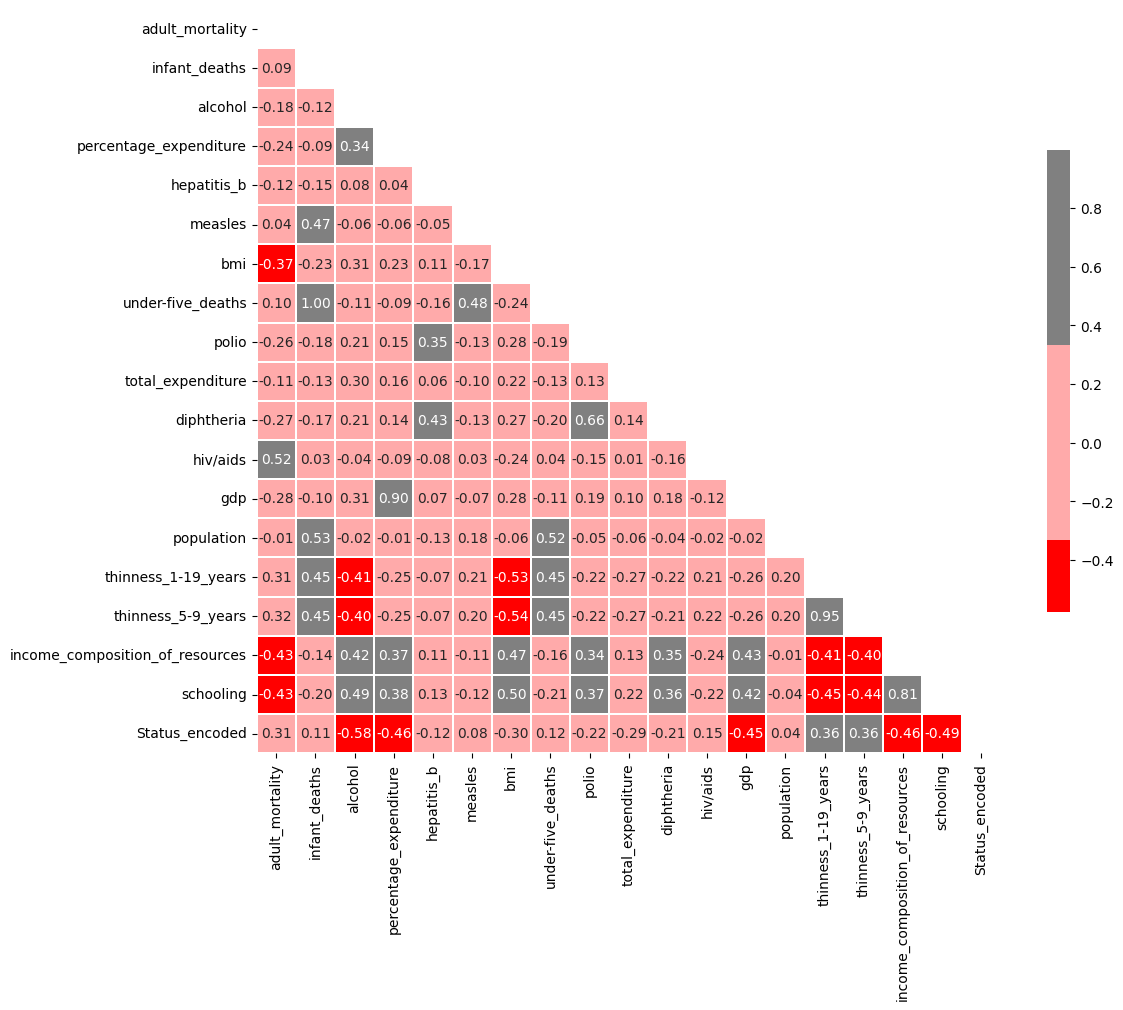

In [21]:
#correlation in form of heatmap
colors =  ['#FF0000', '#FFAAAA', '#808080']
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            mask=mask,
            center=0,
            annot=True,
            fmt='.2f',
            cmap=colors,
            square=True,
            linewidths=.2,
            cbar_kws={"shrink": .6})

Here, we can see that the column "under-5 Deaths" and "Infant Death" has the correlation=1, so we remove one of them. This way we deal with Multicollinearity.

In [22]:
X_train.drop(["under-five_deaths", "thinness_5-9_years"],axis=1, inplace=True)
X_test.drop(["under-five_deaths", "thinness_5-9_years"],axis=1, inplace=True)

In [23]:
X_train.shape

(2342, 17)

In [34]:
result={}

In [24]:
##Linear Regression
reg1=LinearRegression()
sfs1 = sfs(reg1,
           k_features=(1,17),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=9)

# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)


[2023-12-29 13:09:08] Features: 1/17 -- score: 0.5038203124265697
[2023-12-29 13:09:08] Features: 2/17 -- score: 0.6882932540710641
[2023-12-29 13:09:08] Features: 3/17 -- score: 0.7367426878365357
[2023-12-29 13:09:09] Features: 4/17 -- score: 0.7629448685474839
[2023-12-29 13:09:09] Features: 5/17 -- score: 0.7767919942582201
[2023-12-29 13:09:09] Features: 6/17 -- score: 0.7850923955260941
[2023-12-29 13:09:10] Features: 7/17 -- score: 0.7913119238906384
[2023-12-29 13:09:10] Features: 8/17 -- score: 0.7944914761645904
[2023-12-29 13:09:10] Features: 9/17 -- score: 0.7970438523550395
[2023-12-29 13:09:11] Features: 10/17 -- score: 0.798842885446409
[2023-12-29 13:09:11] Features: 11/17 -- score: 0.8000065181497882
[2023-12-29 13:09:11] Features: 12/17 -- score: 0.8008590389968239
[2023-12-29 13:09:11] Features: 13/17 -- score: 0.8008782918574051
[2023-12-29 13:09:11] Features: 14/17 -- score: 0.8008562286820742
[2023-12-29 13:09:11] Features: 15/17 -- score: 0.8008006140836472
[202

In [29]:
best_features = list(sfs1.k_feature_names_)
print(best_features)

['adult_mortality', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'polio', 'diphtheria', 'hiv/aids', 'gdp', 'thinness_1-19_years', 'income_composition_of_resources', 'schooling', 'Status_encoded']


In [31]:
X_train_lr=X_train[best_features]
X_test_lr=X_test[best_features]



In [32]:
param1={'n_jobs':[-1]}
model1= GridSearchCV(reg1,param1,cv=10, scoring="r2", n_jobs=-1).fit(X_train_lr, Y_train)
best_params = model1.best_params_

In [36]:
result_list=[]
model1_lr=reg1.set_params(**best_params)
model1_lr.fit(X_train_lr,Y_train)
y_pred = model1_lr.predict(X_test_lr)
mse = mean_squared_error(Y_test, y_pred)
root_mse=np.sqrt(mse)
mae=mean_absolute_error(Y_test, y_pred)
r2= r2_score(Y_test, y_pred)
result_list.append(root_mse)
result_list.append(mae)
result_list.append(r2)
result_list.append(best_params)
result['Linear Regression']=result_list


#Decision Tree

In [37]:
reg2=DecisionTreeRegressor()
sfs2 = sfs(reg2,
           k_features=(1,17),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=9)

# Perform SFFS
sfs2 = sfs2.fit(X_train, Y_train)


[2023-12-29 13:59:37] Features: 1/17 -- score: 0.7592108696623286
[2023-12-29 13:59:38] Features: 2/17 -- score: 0.8985555456051691
[2023-12-29 13:59:39] Features: 3/17 -- score: 0.9210911193656778
[2023-12-29 13:59:41] Features: 4/17 -- score: 0.9198812689440332
[2023-12-29 13:59:42] Features: 5/17 -- score: 0.9189446422084117
[2023-12-29 13:59:43] Features: 6/17 -- score: 0.9141738957948395
[2023-12-29 13:59:44] Features: 7/17 -- score: 0.9123439763297794
[2023-12-29 13:59:45] Features: 8/17 -- score: 0.9237905881399882
[2023-12-29 13:59:46] Features: 9/17 -- score: 0.927326528680532
[2023-12-29 13:59:48] Features: 10/17 -- score: 0.927828187363968
[2023-12-29 13:59:49] Features: 11/17 -- score: 0.9276697787226108
[2023-12-29 13:59:50] Features: 12/17 -- score: 0.9234835296298337
[2023-12-29 13:59:50] Features: 13/17 -- score: 0.9211120477982083
[2023-12-29 13:59:52] Features: 14/17 -- score: 0.9216154126541459
[2023-12-29 13:59:52] Features: 15/17 -- score: 0.917273012879167
[2023-

In [38]:
best_features = list(sfs2.k_feature_names_)
print(best_features)
X_train_dt=X_train[best_features]
X_test_dt=X_test[best_features]
param2={'splitter':['best'], 'max_depth':[10,15,20], 'min_samples_split':[2,5,10],'criterion':['squared_error']}
model2= GridSearchCV(reg2,param2,cv=10, scoring="r2", n_jobs=-1).fit(X_train_dt, Y_train)
best_params = model2.best_params_

['adult_mortality', 'infant_deaths', 'alcohol', 'hepatitis_b', 'hiv/aids', 'population', 'thinness_1-19_years', 'income_composition_of_resources', 'schooling', 'Status_encoded']


In [39]:
result_list=[]
model1_dt=reg2.set_params(**best_params)
model1_dt.fit(X_train_dt,Y_train)
y_pred = model1_dt.predict(X_test_dt)
mse = mean_squared_error(Y_test, y_pred)
root_mse=np.sqrt(mse)
mae=mean_absolute_error(Y_test, y_pred)
r2= r2_score(Y_test, y_pred)
result_list.append(root_mse)
result_list.append(mae)
result_list.append(r2)
result_list.append(best_params)
result['desicion Tree']=result_list


Random Forest


In [40]:
reg3=RandomForestRegressor()
sfs3 = sfs(reg3,
           k_features=(1,17),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=9)

# Perform SFFS
sfs3 = sfs3.fit(X_train, Y_train)


[2023-12-29 14:04:28] Features: 1/17 -- score: 0.7700537177468477
[2023-12-29 14:05:36] Features: 2/17 -- score: 0.9352673675274618
[2023-12-29 14:07:13] Features: 3/17 -- score: 0.9501512146164305
[2023-12-29 14:09:10] Features: 4/17 -- score: 0.9549152023219235
[2023-12-29 14:10:53] Features: 5/17 -- score: 0.9597507294695468
[2023-12-29 14:12:27] Features: 6/17 -- score: 0.9608545468025612
[2023-12-29 14:13:56] Features: 7/17 -- score: 0.9613234665408515
[2023-12-29 14:15:29] Features: 8/17 -- score: 0.961295235693393
[2023-12-29 14:16:56] Features: 9/17 -- score: 0.9615193251113087
[2023-12-29 14:18:20] Features: 10/17 -- score: 0.9606168175554901
[2023-12-29 14:19:41] Features: 11/17 -- score: 0.9603426911622963
[2023-12-29 14:20:59] Features: 12/17 -- score: 0.960389968616188
[2023-12-29 14:22:06] Features: 13/17 -- score: 0.960187584182348
[2023-12-29 14:23:04] Features: 14/17 -- score: 0.9597187205136373
[2023-12-29 14:23:51] Features: 15/17 -- score: 0.9587036737869765
[2023-

In [41]:
best_features = list(sfs3.k_feature_names_)
print(best_features)
X_train_rf=X_train[best_features]
X_test_rf=X_test[best_features]
param3= {'n_estimators':[100,150], 'max_depth':[10,15,20], 'min_samples_split':[2,5,10], 'criterion':['squared_error']}
model3= GridSearchCV(reg3,param3,cv=10, scoring="r2", n_jobs=-1).fit(X_train_rf, Y_train)
best_params = model3.best_params_

['adult_mortality', 'infant_deaths', 'alcohol', 'diphtheria', 'hiv/aids', 'thinness_1-19_years', 'income_composition_of_resources', 'schooling', 'Status_encoded']


In [42]:
result_list=[]
model1_rf=reg3.set_params(**best_params)
model1_rf.fit(X_train_rf,Y_train)
y_pred = model1_rf.predict(X_test_rf)
mse = mean_squared_error(Y_test, y_pred)
root_mse=np.sqrt(mse)
mae=mean_absolute_error(Y_test, y_pred)
r2= r2_score(Y_test, y_pred)
result_list.append(root_mse)
result_list.append(mae)
result_list.append(r2)
result_list.append(best_params)
result['Random Forest']=result_list

XGboost Regressor

In [51]:
reg4=XGBRegressor()
sfs4 = sfs(reg4,
           k_features=(1,17),
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=9)

# Perform SFFS
sfs4 = sfs4.fit(X_train, Y_train)


[2023-12-29 15:22:27] Features: 1/17 -- score: 0.7765990585854077
[2023-12-29 15:22:35] Features: 2/17 -- score: 0.9177416325052589
[2023-12-29 15:22:49] Features: 3/17 -- score: 0.9369506066986385
[2023-12-29 15:23:04] Features: 4/17 -- score: 0.9499375657627964
[2023-12-29 15:23:20] Features: 5/17 -- score: 0.9555214942182718
[2023-12-29 15:23:40] Features: 6/17 -- score: 0.9573564130367056
[2023-12-29 15:23:59] Features: 7/17 -- score: 0.9587549887358738
[2023-12-29 15:24:17] Features: 8/17 -- score: 0.960129720685894
[2023-12-29 15:24:36] Features: 9/17 -- score: 0.9599253711254678
[2023-12-29 15:24:53] Features: 10/17 -- score: 0.9590580832853072
[2023-12-29 15:25:08] Features: 11/17 -- score: 0.9593908397349171
[2023-12-29 15:25:21] Features: 12/17 -- score: 0.9588430209798451
[2023-12-29 15:25:31] Features: 13/17 -- score: 0.9582813247447266
[2023-12-29 15:25:43] Features: 14/17 -- score: 0.9582217508329107
[2023-12-29 15:25:53] Features: 15/17 -- score: 0.9557748267507932
[202

In [44]:
best_features = list(sfs4.k_feature_names_)
print(best_features)
X_train_xg=X_train[best_features]
X_test_xg=X_test[best_features]
param4= {'nthread':[4], 'learning_rate': [.03, 0.05, .07], 'max_depth': [5, 6, 7],'n_estimators': [500]}
model4= GridSearchCV(reg4,param4,cv=10, scoring="r2", n_jobs=-1).fit(X_train_xg, Y_train)
best_params = model4.best_params_

['adult_mortality', 'infant_deaths', 'alcohol', 'total_expenditure', 'hiv/aids', 'thinness_1-19_years', 'income_composition_of_resources', 'schooling']


In [45]:
result_list=[]
model1_xg=reg4.set_params(**best_params)
model1_xg.fit(X_train_xg,Y_train)
y_pred = model1_xg.predict(X_test_xg)
mse = mean_squared_error(Y_test, y_pred)
root_mse=np.sqrt(mse)
mae=mean_absolute_error(Y_test, y_pred)
r2= r2_score(Y_test, y_pred)
result_list.append(root_mse)
result_list.append(mae)
result_list.append(r2)
result_list.append(best_params)
result['Xgboost Regressor']=result_list

In [46]:
final_results= pd.DataFrame(result)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="RootMeanSquaredError"
columns[1]="MeanAbsoluteError"
columns[2]="R2_Score"
columns[3]="best parameters"
final_results.columns=columns
final_results

,RootMeanSquaredError,MeanAbsoluteError,R2_Score,best parameters
Linear Regression,3.972782,2.968981,0.829314,{'n_jobs': -1}
desicion Tree,2.519476,1.645448,0.931352,"{'criterion': 'squared_error', 'max_depth': 10..."
Random Forest,1.7245,1.055346,0.967839,"{'criterion': 'squared_error', 'max_depth': 20..."
Xgboost Regressor,1.735679,1.069045,0.96742,"{'learning_rate': 0.07, 'max_depth': 7, 'n_est..."




```
# This is formatted as code
```

Backward feature seelction

In [50]:
reg3=RandomForestRegressor()
sfs3 = sfs(reg3,
           k_features=(1,17),
           forward=False,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=9)

# Perform SFFS
sfs3 = sfs3.fit(X_train, Y_train)


[2023-12-29 14:57:52] Features: 16/1 -- score: 0.9592192110733416
[2023-12-29 15:02:04] Features: 15/1 -- score: 0.9591383573821692
[2023-12-29 15:05:41] Features: 14/1 -- score: 0.959454756051674
[2023-12-29 15:08:49] Features: 13/1 -- score: 0.9601855120150833
[2023-12-29 15:11:32] Features: 12/1 -- score: 0.9601951522521625
[2023-12-29 15:13:45] Features: 11/1 -- score: 0.9609462326244853
[2023-12-29 15:15:42] Features: 10/1 -- score: 0.9612655774003288
[2023-12-29 15:17:16] Features: 9/1 -- score: 0.960604755247087
[2023-12-29 15:18:34] Features: 8/1 -- score: 0.9609154432626332
[2023-12-29 15:19:40] Features: 7/1 -- score: 0.9608826484522781
[2023-12-29 15:20:33] Features: 6/1 -- score: 0.9610655375925747
[2023-12-29 15:21:12] Features: 5/1 -- score: 0.959760923594345
[2023-12-29 15:21:41] Features: 4/1 -- score: 0.9553759390039844
[2023-12-29 15:21:59] Features: 3/1 -- score: 0.9502089491160687
[2023-12-29 15:22:12] Features: 2/1 -- score: 0.9350848319876164
[2023-12-29 15:22:16

In [52]:
best_features = list(sfs3.k_feature_names_)
print(best_features)
X_train_rf=X_train[best_features]
X_test_rf=X_test[best_features]
param3= {'n_estimators':[100,150], 'max_depth':[10,15,20], 'min_samples_split':[2,5,10], 'criterion':['squared_error']}
model3= GridSearchCV(reg3,param3,cv=10, scoring="r2", n_jobs=-1).fit(X_train_rf, Y_train)
best_params = model3.best_params_

['adult_mortality', 'infant_deaths', 'hepatitis_b', 'total_expenditure', 'diphtheria', 'hiv/aids', 'thinness_1-19_years', 'income_composition_of_resources', 'schooling', 'Status_encoded']


In [53]:
result_b={}
result_list=[]
model1_rf=reg3.set_params(**best_params)
model1_rf.fit(X_train_rf,Y_train)
y_pred = model1_rf.predict(X_test_rf)
mse = mean_squared_error(Y_test, y_pred)
root_mse=np.sqrt(mse)
mae=mean_absolute_error(Y_test, y_pred)
r2= r2_score(Y_test, y_pred)
result_list.append(root_mse)
result_list.append(mae)
result_list.append(r2)
result_list.append(best_params)
result_b['Random Forest']=result_list

In [54]:
reg4=XGBRegressor()
sfs4 = sfs(reg4,
           k_features=(1,17),
           forward=False,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=9)

# Perform SFFS
sfs4 = sfs4.fit(X_train, Y_train)


[2023-12-29 15:34:41] Features: 16/1 -- score: 0.9561724640162138
[2023-12-29 15:35:27] Features: 15/1 -- score: 0.9565996854706529
[2023-12-29 15:36:08] Features: 14/1 -- score: 0.9575008990924037
[2023-12-29 15:36:41] Features: 13/1 -- score: 0.9574456602920672
[2023-12-29 15:37:11] Features: 12/1 -- score: 0.9580276312032365
[2023-12-29 15:37:36] Features: 11/1 -- score: 0.9587675950173161
[2023-12-29 15:37:55] Features: 10/1 -- score: 0.9588593353911921
[2023-12-29 15:38:11] Features: 9/1 -- score: 0.9598238079382762
[2023-12-29 15:38:33] Features: 8/1 -- score: 0.9588683670243889
[2023-12-29 15:38:44] Features: 7/1 -- score: 0.9576605754036763
[2023-12-29 15:38:53] Features: 6/1 -- score: 0.9573564130367056
[2023-12-29 15:39:02] Features: 5/1 -- score: 0.9555214942182718
[2023-12-29 15:39:05] Features: 4/1 -- score: 0.9499375657627964
[2023-12-29 15:39:08] Features: 3/1 -- score: 0.9369506066986385
[2023-12-29 15:39:10] Features: 2/1 -- score: 0.9177416325052589
[2023-12-29 15:39

In [55]:
best_features = list(sfs4.k_feature_names_)
print(best_features)
X_train_xg=X_train[best_features]
X_test_xg=X_test[best_features]
param4= {'nthread':[4], 'learning_rate': [.03, 0.05, .07], 'max_depth': [5, 6, 7],'n_estimators': [500]}
model4= GridSearchCV(reg4,param4,cv=10, scoring="r2", n_jobs=-1).fit(X_train_xg, Y_train)
best_params = model4.best_params_

['adult_mortality', 'infant_deaths', 'hepatitis_b', 'total_expenditure', 'hiv/aids', 'thinness_1-19_years', 'income_composition_of_resources', 'schooling', 'Status_encoded']


In [56]:
result_list=[]
model1_xg=reg4.set_params(**best_params)
model1_xg.fit(X_train_xg,Y_train)
y_pred = model1_xg.predict(X_test_xg)
mse = mean_squared_error(Y_test, y_pred)
root_mse=np.sqrt(mse)
mae=mean_absolute_error(Y_test, y_pred)
r2= r2_score(Y_test, y_pred)
result_list.append(root_mse)
result_list.append(mae)
result_list.append(r2)
result_list.append(best_params)
result_b['Xgboost Regressor']=result_list

In [57]:
final_results= pd.DataFrame(result_b)
final_results=final_results.T
columns=final_results.columns.tolist()
columns[0]="RootMeanSquaredError"
columns[1]="MeanAbsoluteError"
columns[2]="R2_Score"
columns[3]="best parameters"
final_results.columns=columns
final_results

,RootMeanSquaredError,MeanAbsoluteError,R2_Score,best parameters
Random Forest,1.745014,1.083217,0.967069,"{'criterion': 'squared_error', 'max_depth': 20..."
Xgboost Regressor,1.656555,1.074139,0.970323,"{'learning_rate': 0.05, 'max_depth': 7, 'n_est..."
